In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import models,layers

In [20]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

CLASS_NAMES = ['Target_Spot', 'Tomato_mosaic_virus', 'Tomato_YellowLeaf_Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_late_blight', 'Tomato_leaf_mold', 'Tomato_septoria_leaf_spot', 'Tomato_spider_mites_two_spotted_spider_mite']

In [21]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='TomatoData',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)
CLASS_NAMES = dataset.class_names
CLASS_NAMES

Found 16011 files belonging to 10 classes.


['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [22]:
def get_dataset_partition(ds, train_split = 0.6, val_split = 0.3, test_split = 0.1, shuffle=True, shuffle_size = 10000):



    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(ds_size*train_split)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    val_ds = test_ds.take(val_size)
    test_ds = test_ds.skip(val_size)

    return train_ds, val_ds, test_ds


In [23]:
train_ds, val_ds, test_ds = get_dataset_partition(dataset)


train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)



In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])



In [25]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
   
    layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
 
    layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2), padding='same'),

    layers.Conv2D(128, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2), padding='same'),
 
    layers.Conv2D(128, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2), padding='same'),
    
    
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

    

])


model.build(input_shape=input_shape)


Model Default : 97%

Model Dropouts, Denser : 93%

Beta 1 : 87%

In [26]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (32, 62, 62, 32)         0         
 2D)                                                  

In [27]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

history = model.fit(
    train_ds, 
    epochs= EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,

)

Epoch 1/30
300/300 [==============================] - 72s 213ms/step - loss: 1.9157 - accuracy: 0.3014 - val_loss: 1.7044 - val_accuracy: 0.3869
Epoch 2/30
300/300 [==============================] - 48s 161ms/step - loss: 1.5874 - accuracy: 0.4341 - val_loss: 1.3304 - val_accuracy: 0.5332
Epoch 3/30
300/300 [==============================] - 49s 164ms/step - loss: 1.2926 - accuracy: 0.5366 - val_loss: 1.1376 - val_accuracy: 0.5687
Epoch 4/30
300/300 [==============================] - 49s 163ms/step - loss: 1.0896 - accuracy: 0.6067 - val_loss: 1.0692 - val_accuracy: 0.6185
Epoch 5/30
300/300 [==============================] - 49s 163ms/step - loss: 0.9450 - accuracy: 0.6620 - val_loss: 1.7604 - val_accuracy: 0.5162
Epoch 6/30
300/300 [==============================] - 49s 164ms/step - loss: 0.7903 - accuracy: 0.7205 - val_loss: 1.3387 - val_accuracy: 0.6139
Epoch 7/30
300/300 [==============================] - 52s 174ms/step - loss: 0.6915 - accuracy: 0.7533 - val_loss: 1.0990 - val_ac

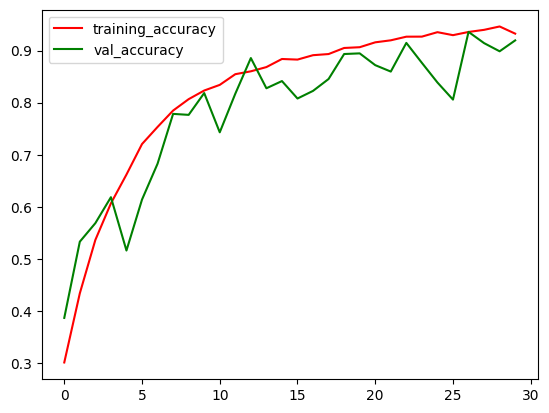

: 

In [37]:
plt.plot(range(EPOCHS),history.history['accuracy'],label='training_accuracy',c='red')
plt.plot(range(EPOCHS),history.history['val_accuracy'],label='val_accuracy',c='green')
plt.legend()


In [30]:
model.save("models/beta_1")

INFO:tensorflow:Assets written to: models/beta_1\assets


INFO:tensorflow:Assets written to: models/beta_1\assets


1/1 [==============================] - 0s 102ms/step
(256, 256, 3)


Text(0.5, 1.0, 'Actual Class Name: Tomato__Target_Spot, \n Predicted Class Name : Tomato__Target_Spot, \n Confidence : 100')

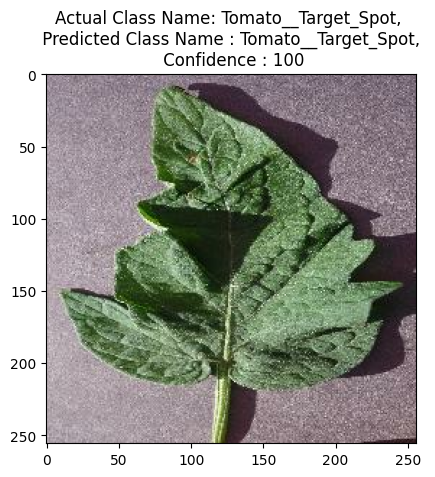

In [36]:
from keras.models import load_model

model = load_model(r'C:\Tomato-Disease-Detection\models\beta_1')


def predict_class(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[0])
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    predict_class = CLASS_NAMES[np.argmax(prediction[0])]
    confidence = round(100*np.max(prediction[0]))

    return {'class': predict_class, 
            'confidence':confidence
            }

data = test_ds.take(1)

image = 0
label = 0

for images, labels in data:
    image = images[0]
    label = labels[0]
    break
prediction = predict_class(model, np.expand_dims(image, axis=0))
print(np.shape(image))

plt.imshow(images[0].numpy().astype('uint8'))
plt.title(f"Actual Class Name: {CLASS_NAMES[labels[0]]}, \n Predicted Class Name : {prediction['class']}, \n Confidence : {prediction['confidence']}")

1/1 [==============================] - 0s 31ms/step


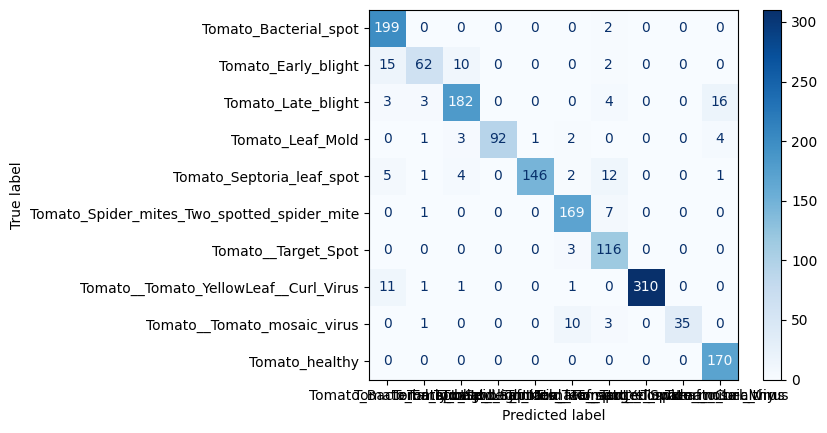

In [15]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Assuming you already have your model and test_ds defined
# Also assuming test_ds is not batched and shuffled for simplicity

# Step 1: Get Predictions for the Test Set
y_true = []
y_pred = []

for images, labels in test_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# Step 2: Compute the Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Optional: Plot the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [19]:
model_1_summary = (load_model(r'C:\Tomato-Disease-Detection\models\dropouts_and_more_complex_layers')).summary()
model_1_summary

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                      